# Sampling Experiments

In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [2]:
def V(x):
    return 0.5 + jnp.sum(x**2)

gradient = jax.grad(V)

def update(x, key, h=0.1):
    key, subkey = jax.random.split(key)
    noise = jax.random.normal(subkey, shape=x.shape)
    x = x - h * gradient(x) + jnp.sqrt(2*h)* noise
    return x, key

def ula(x_0, key, T=100, h=0.1):
    x = x_0
    samples = [x]
    for i in range (T):
        x, key = update(x, key, h)
        samples.append(x)
    return jnp.stack(samples)

In [3]:
key = jax.random.PRNGKey(1)
x_init = jnp.array([10.0, -10.0])  # Initial state
T = 1000  # Number of iterations

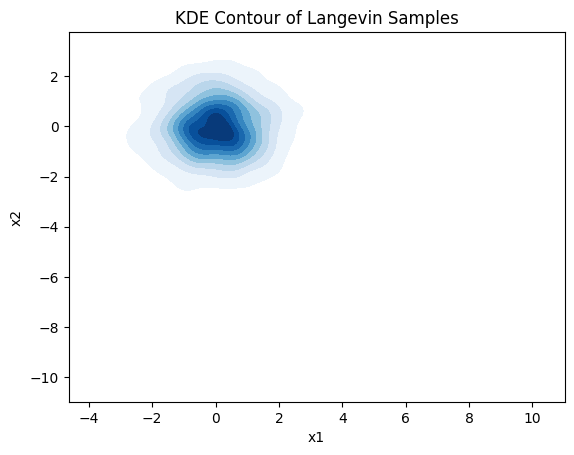

In [4]:
langevin_samples = ula(x_init, key, T=T, h=0.5)

sns.kdeplot(x=langevin_samples[:, 0], y=langevin_samples[:, 1], fill=True, cmap="Blues")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("KDE Contour of Langevin Samples")
plt.show()

In [5]:
def update_with_momentum(x, m, key, h=0.1, g=0.9):
    key, subkey = jax.random.split(key)
    noise = jax.random.normal(subkey, shape=x.shape)
    m = (1 - g)*m - h*gradient(x) + + jnp.sqrt(2*h*g)* noise
    x = x + m 
    return x, m, key

def underdamped_la(x_0, key, T=100, h=0.1, g=0.9):
    x, m = x_0, jnp.zeros_like(x_0)
    samples = [x]
    for i in range (T):
        x, m, key = update_with_momentum(x, m, key, h,g)
        samples.append(x)
    return jnp.stack(samples)

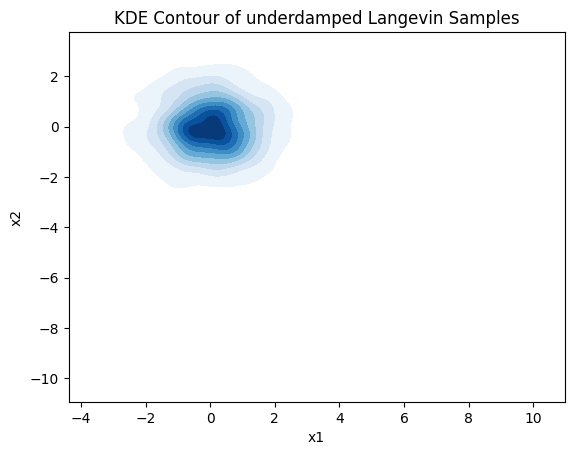

In [6]:
underdamped_samples = underdamped_la(x_init, key, T=T, h=0.5, g=0.9)

sns.kdeplot(x=underdamped_samples[:, 0], y=underdamped_samples[:, 1], fill=True, cmap="Blues")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("KDE Contour of underdamped Langevin Samples")
plt.show()

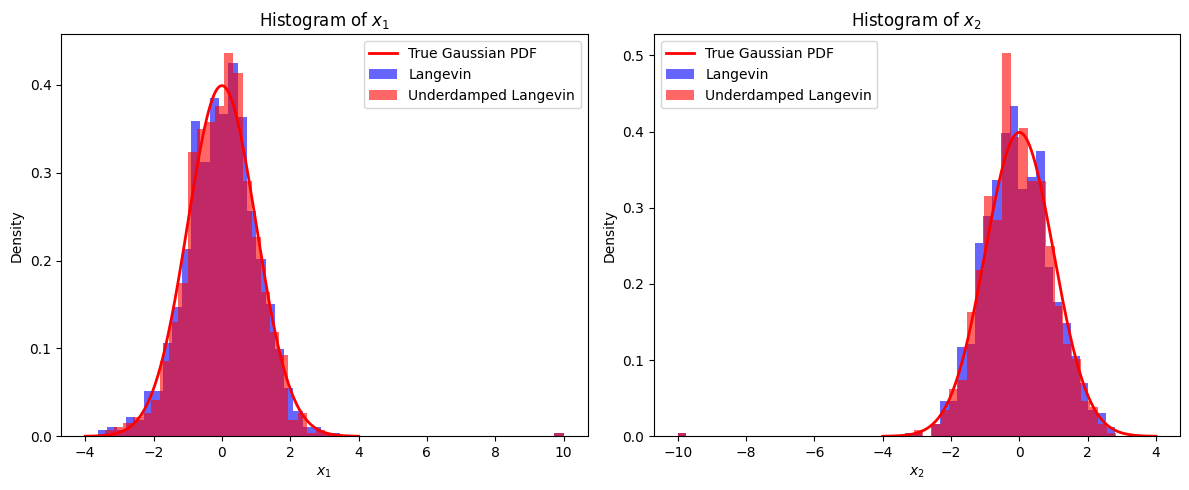

In [7]:
x1_langevin, x2_langevin = langevin_samples[:, 0], langevin_samples[:, 1]
x1_underdamped, x2_underdamped = underdamped_samples[:, 0], underdamped_samples[:, 1]

# Plot histograms for x1
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
x_vals = np.linspace(-4, 4, 1000)
true_pdf = scipy.stats.norm.pdf(x_vals, loc=0, scale=1)
plt.plot(x_vals, true_pdf, 'r', label="True Gaussian PDF", linewidth=2)
plt.hist(x1_langevin, bins=50, alpha=0.6, color='blue', density=True, label="Langevin")
plt.hist(x1_underdamped, bins=50, alpha=0.6, color='red', density=True, label="Underdamped Langevin")
plt.xlabel("$x_1$")
plt.ylabel("Density")
plt.title("Histogram of $x_1$")
plt.legend()

# Plot histograms for x2
plt.subplot(1, 2, 2)
plt.plot(x_vals, true_pdf, 'r', label="True Gaussian PDF", linewidth=2)
plt.hist(x2_langevin, bins=50, alpha=0.6, color='blue', density=True, label="Langevin")
plt.hist(x2_underdamped, bins=50, alpha=0.6, color='red', density=True, label="Underdamped Langevin")
plt.xlabel("$x_2$")
plt.ylabel("Density")
plt.title("Histogram of $x_2$")
plt.legend()

plt.tight_layout()
plt.show()